# Plotando gráficos com dados populacionais do Brasil

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Coletando dados e preparando para a plotagem

In [96]:
#   Dados extraídos de: https://dados.al.gov.br/catalogo/datastore/dump/a77d4575-b225-444d-9e46-92362ae27b21
df = pd.read_csv('a77d4575-b225-444d-9e46-92362ae27b21.csv', sep = ',').replace('...', 0).astype({'co_uf': np.int64, 'valor': np.int64}).drop('_id', axis = 1)

#   Pegando ocorrências distintas nos dados históricos (consideramos o período de 1970 até 2022)
anos = df['ano'].unique()
print('Os anos observados são: ', anos, '\n')

#   Alterando o índice do DataFrame para corresponder as variações de ano e código UF, assim facilita a pesquisa por ano
df = df.set_index(['ano', 'co_uf'])
df.info()
df.head()

Os anos observados são:  [1970 1980 1991 2000 2010 2022] 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 162 entries, (1970, 11) to (2022, 53)
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no_uf             162 non-null    object
 1   variavel          162 non-null    object
 2   pop_categoria     162 non-null    object
 3   pop_subcategoria  162 non-null    object
 4   valor             162 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 8.2+ KB


,,no_uf,variavel,pop_categoria,pop_subcategoria,valor
ano,co_uf,,,,,
1970,11,Rondônia,População residente censitária,Total,Total,111064
1980,11,Rondônia,População residente censitária,Total,Total,491025
1991,11,Rondônia,População residente censitária,Total,Total,1132692
2000,11,Rondônia,População residente censitária,Total,Total,1379787
2010,11,Rondônia,População residente censitária,Total,Total,1562409


In [90]:
#   Pesquisar as Unidades Federativas na internet
estados = pd.read_html('https://www.oobj.com.br/bc/article/quais-os-c%C3%B3digos-de-cada-uf-no-brasil-465.html')
estados = estados[0].set_index('Código UF').sort_index(ascending = False)

#   Criar uma cópia das UFs em CSV
estados.to_csv('estados.csv', index = 'Código UF', sep = ',')

estados

,Unidade da Federação,UF
Código UF,,
53,Distrito Federal,DF
52,Goiás,GO
51,Mato Grosso,MT
50,Mato Grosso do Sul,MS
43,Rio Grande do Sul (*),RS
42,Santa Catarina,SC
41,Paraná,PR
35,São Paulo,SP
33,Rio de Janeiro,RJ


### Verificando quantos Estados existiam em cada apuração. 
- Mato Grosso do Sul se desmembrou de Mato Grosso em 11/10/1977
- Antes de 1988, Tocantins era parte de Goiás (nasceu junto com a Constiuição Cidadã?)

In [82]:
for ano in anos:    
    censo = df.loc[ano,].sort_index(ascending = False)    
    print(f"Em {ano} existiam {len(censo[censo['valor'] > 0])} Unidades Federativas")

Em 1970 existiam 25 Unidades Federativas
Em 1980 existiam 26 Unidades Federativas
Em 1991 existiam 27 Unidades Federativas
Em 2000 existiam 27 Unidades Federativas
Em 2010 existiam 27 Unidades Federativas
Em 2022 existiam 27 Unidades Federativas


C:\Users\darth\AppData\Local\Temp\ipykernel_236\3538388004.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  censo = df.loc[ano,].sort_index(ascending = False)


In [91]:
df.loc[2022]

,no_uf,variavel,pop_categoria,pop_subcategoria,valor
co_uf,,,,,
11,Rondônia,População residente censitária,Total,Total,1581016
12,Acre,População residente censitária,Total,Total,830026
13,Amazonas,População residente censitária,Total,Total,3941175
14,Roraima,População residente censitária,Total,Total,636303
15,Pará,População residente censitária,Total,Total,8116132
16,Amapá,População residente censitária,Total,Total,733508
17,Tocantins,População residente censitária,Total,Total,1511459
21,Maranhão,População residente censitária,Total,Total,6775152
22,Piauí,População residente censitária,Total,Total,3269200


### Garantir a ordem nos df para copiar a informação correta

In [34]:
copy = df.loc[2022].copy().sort_values(['co_uf'], ascending = [False])
estados = estados.sort_values(['Código UF'], ascending = [False])
copy['uf'] = estados['UF'].values
copy

,no_uf,variavel,pop_categoria,pop_subcategoria,valor,uf
co_uf,,,,,,
53,Distrito Federal,População residente censitária,Total,Total,2817068,DF
52,Goiás,População residente censitária,Total,Total,7055228,GO
51,Mato Grosso,População residente censitária,Total,Total,3658813,MT
50,Mato Grosso do Sul,População residente censitária,Total,Total,2756700,MS
43,Rio Grande do Sul,População residente censitária,Total,Total,10880506,RS
42,Santa Catarina,População residente censitária,Total,Total,7609601,SC
41,Paraná,População residente censitária,Total,Total,11443208,PR
35,São Paulo,População residente censitária,Total,Total,44420459,SP
33,Rio de Janeiro,População residente censitária,Total,Total,16054524,RJ


In [23]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Realizando a plotagem dos gráficos
- loop for é usado para definir apenas uma vez e plotar várias;
- matplotlib é encapsulado tanto pelo pandas como pelo seaborn, poderia misturar as chamadas dos métodos destas bibliotecas já que por baixo é o matplotlib

C:\Users\darth\AppData\Local\Temp\ipykernel_236\3757037885.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  dados = df.loc[ano,].sort_index(ascending = False)


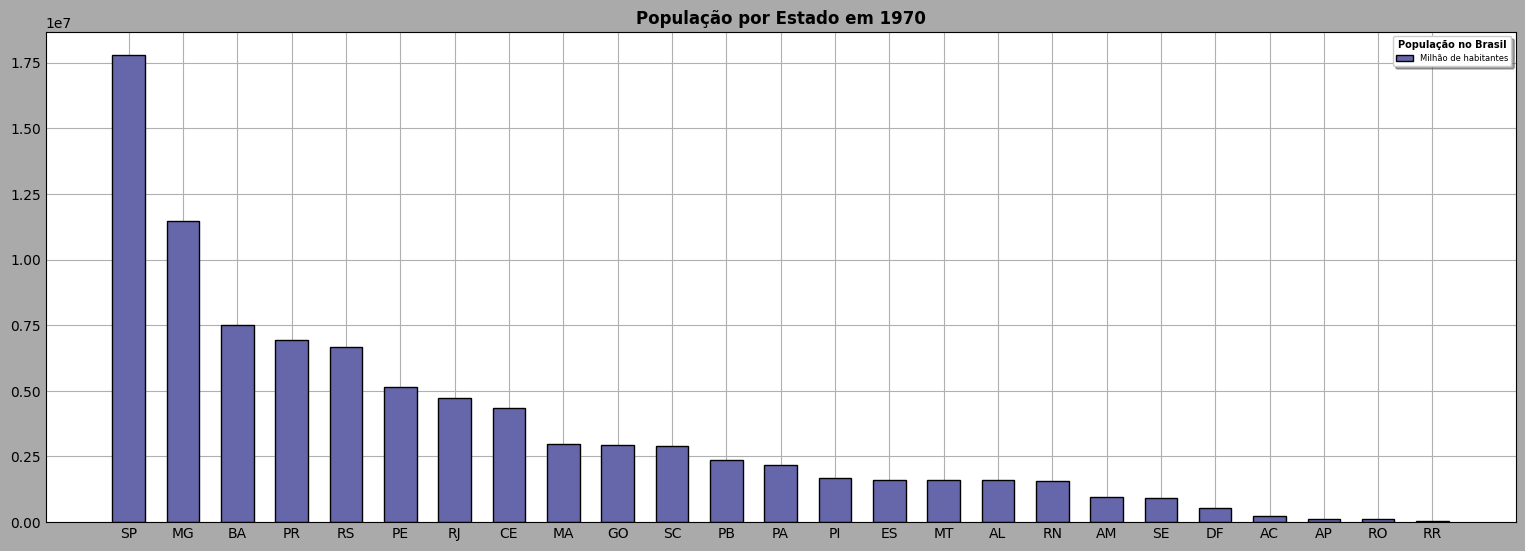

C:\Users\darth\AppData\Local\Temp\ipykernel_236\3757037885.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  dados = df.loc[ano,].sort_index(ascending = False)


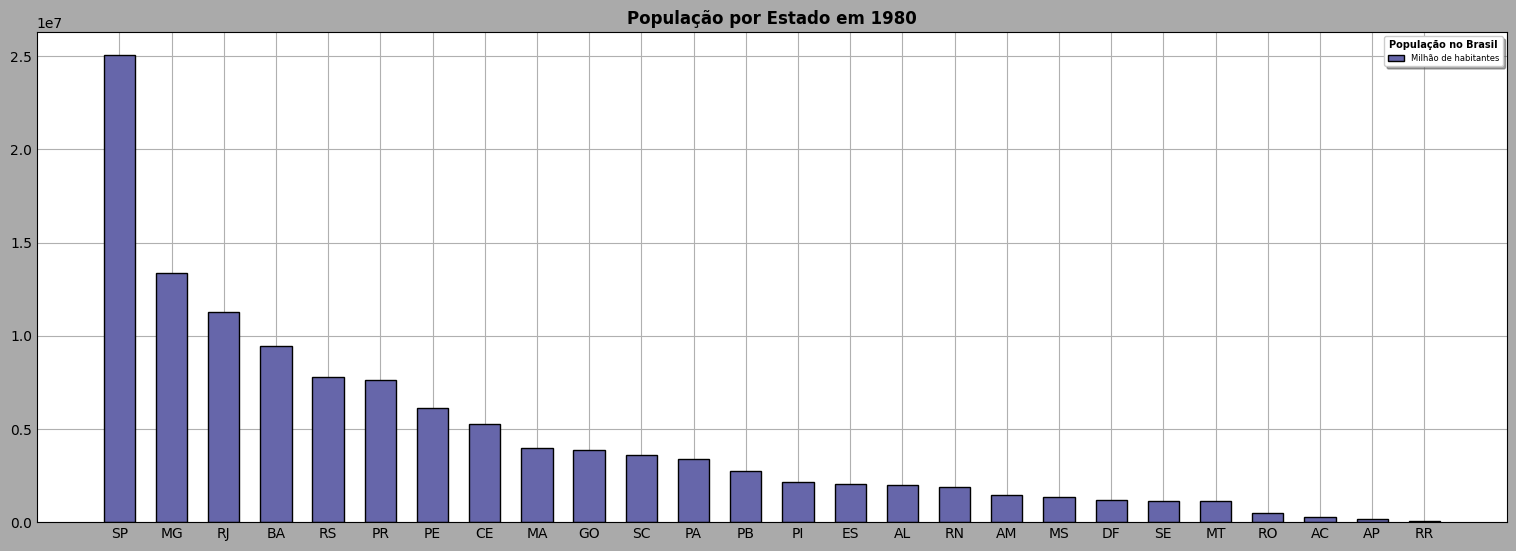

C:\Users\darth\AppData\Local\Temp\ipykernel_236\3757037885.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  dados = df.loc[ano,].sort_index(ascending = False)


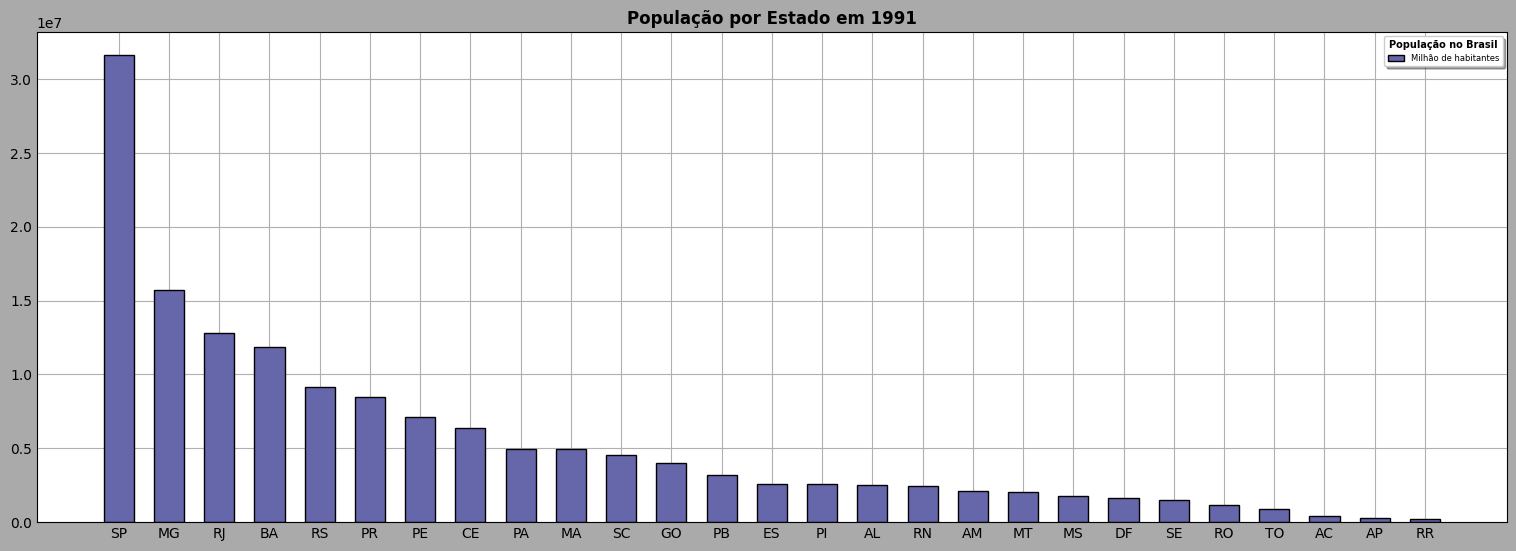

C:\Users\darth\AppData\Local\Temp\ipykernel_236\3757037885.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  dados = df.loc[ano,].sort_index(ascending = False)


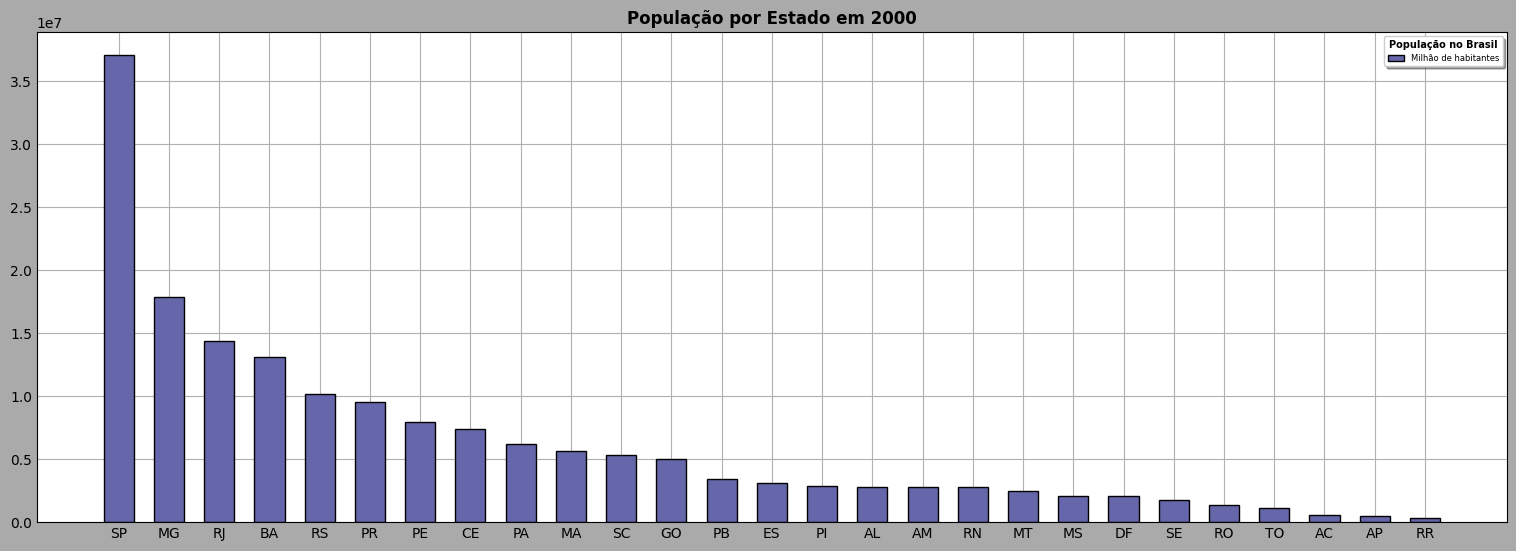

C:\Users\darth\AppData\Local\Temp\ipykernel_236\3757037885.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  dados = df.loc[ano,].sort_index(ascending = False)


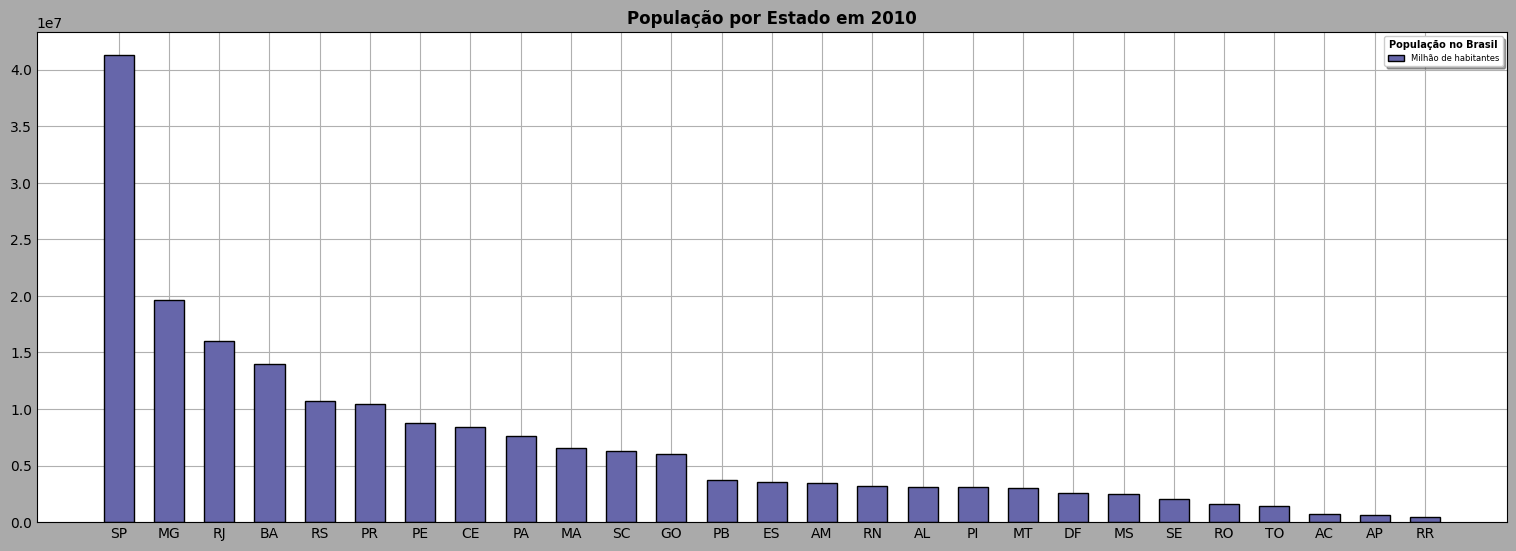

C:\Users\darth\AppData\Local\Temp\ipykernel_236\3757037885.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  dados = df.loc[ano,].sort_index(ascending = False)


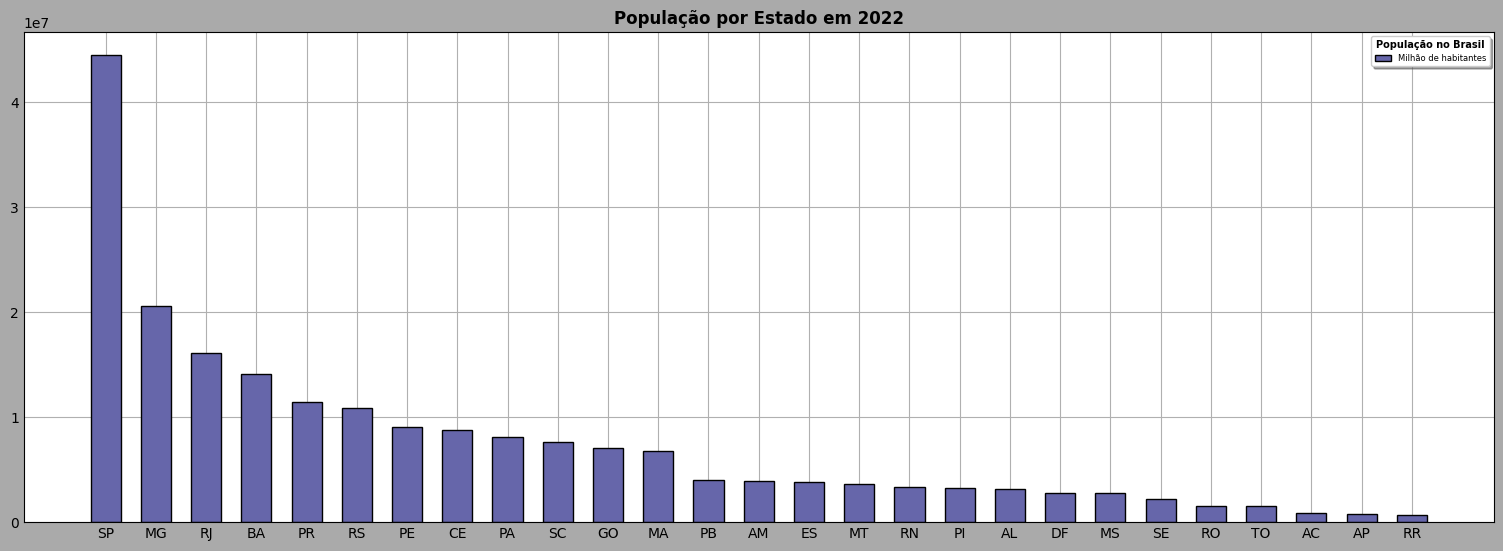

In [76]:
#   Especifica-se o ascending mesmo no sort_index para não comprometer a informação
estados.sort_index(ascending = False)
plt.style.use('_mpl-gallery')

for ano in anos:
    dados = df.loc[ano,].sort_index(ascending = False)
    dados['uf'] = estados['UF'].values
    dados = dados.sort_values(['valor'], ascending = [False])
    dados = dados[dados['valor'] > 0]    

    plt.figure(figsize = (15, 5), facecolor = '#AAA')
    plt.bar(edgecolor = '#000',
            facecolor = '#66A',
            data = dados,
            x = dados['uf'],
            width = .6,            
            height = dados['valor'],  
    )   
    plt.title(f'População por Estado em {ano}').set_fontweight('bold')
    plt.legend(['Milhão de habitantes'], fontsize = 6, title = 'População no Brasil', title_fontsize = 7, shadow = True).get_title().set_weight('bold')            
    plt.show()

    #   1e7 -> Notação Científica para 0.1 elevado à 7

#### Podemos observar nestes gráficos que: 
- São Paulo e Minas Gerais são os 2 estados com o maior número de habitantes;
- População de São Paulo é quase sempre o dobro de Minas Gerais;
- Roraima tem o menor número de habitantes